# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,confusion_matrix


In [2]:
# Loading dataset
df = pd.read_csv("C:/DBS study/Project/CA2/B9DA108_2425/heart.csv")

In [3]:
# check for rows and columns
df.shape

(303, 14)

In [4]:
# Checking few rows
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
# identifying missing value and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#checking sum of null values and aobserve there is one colunm of null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Found the duplicate respondent with same data
print(df.shape)
df.duplicated().sum()

(303, 14)


1

In [8]:
# remove the duplicate respondent with same data
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

In [9]:
# checking for data distributions
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


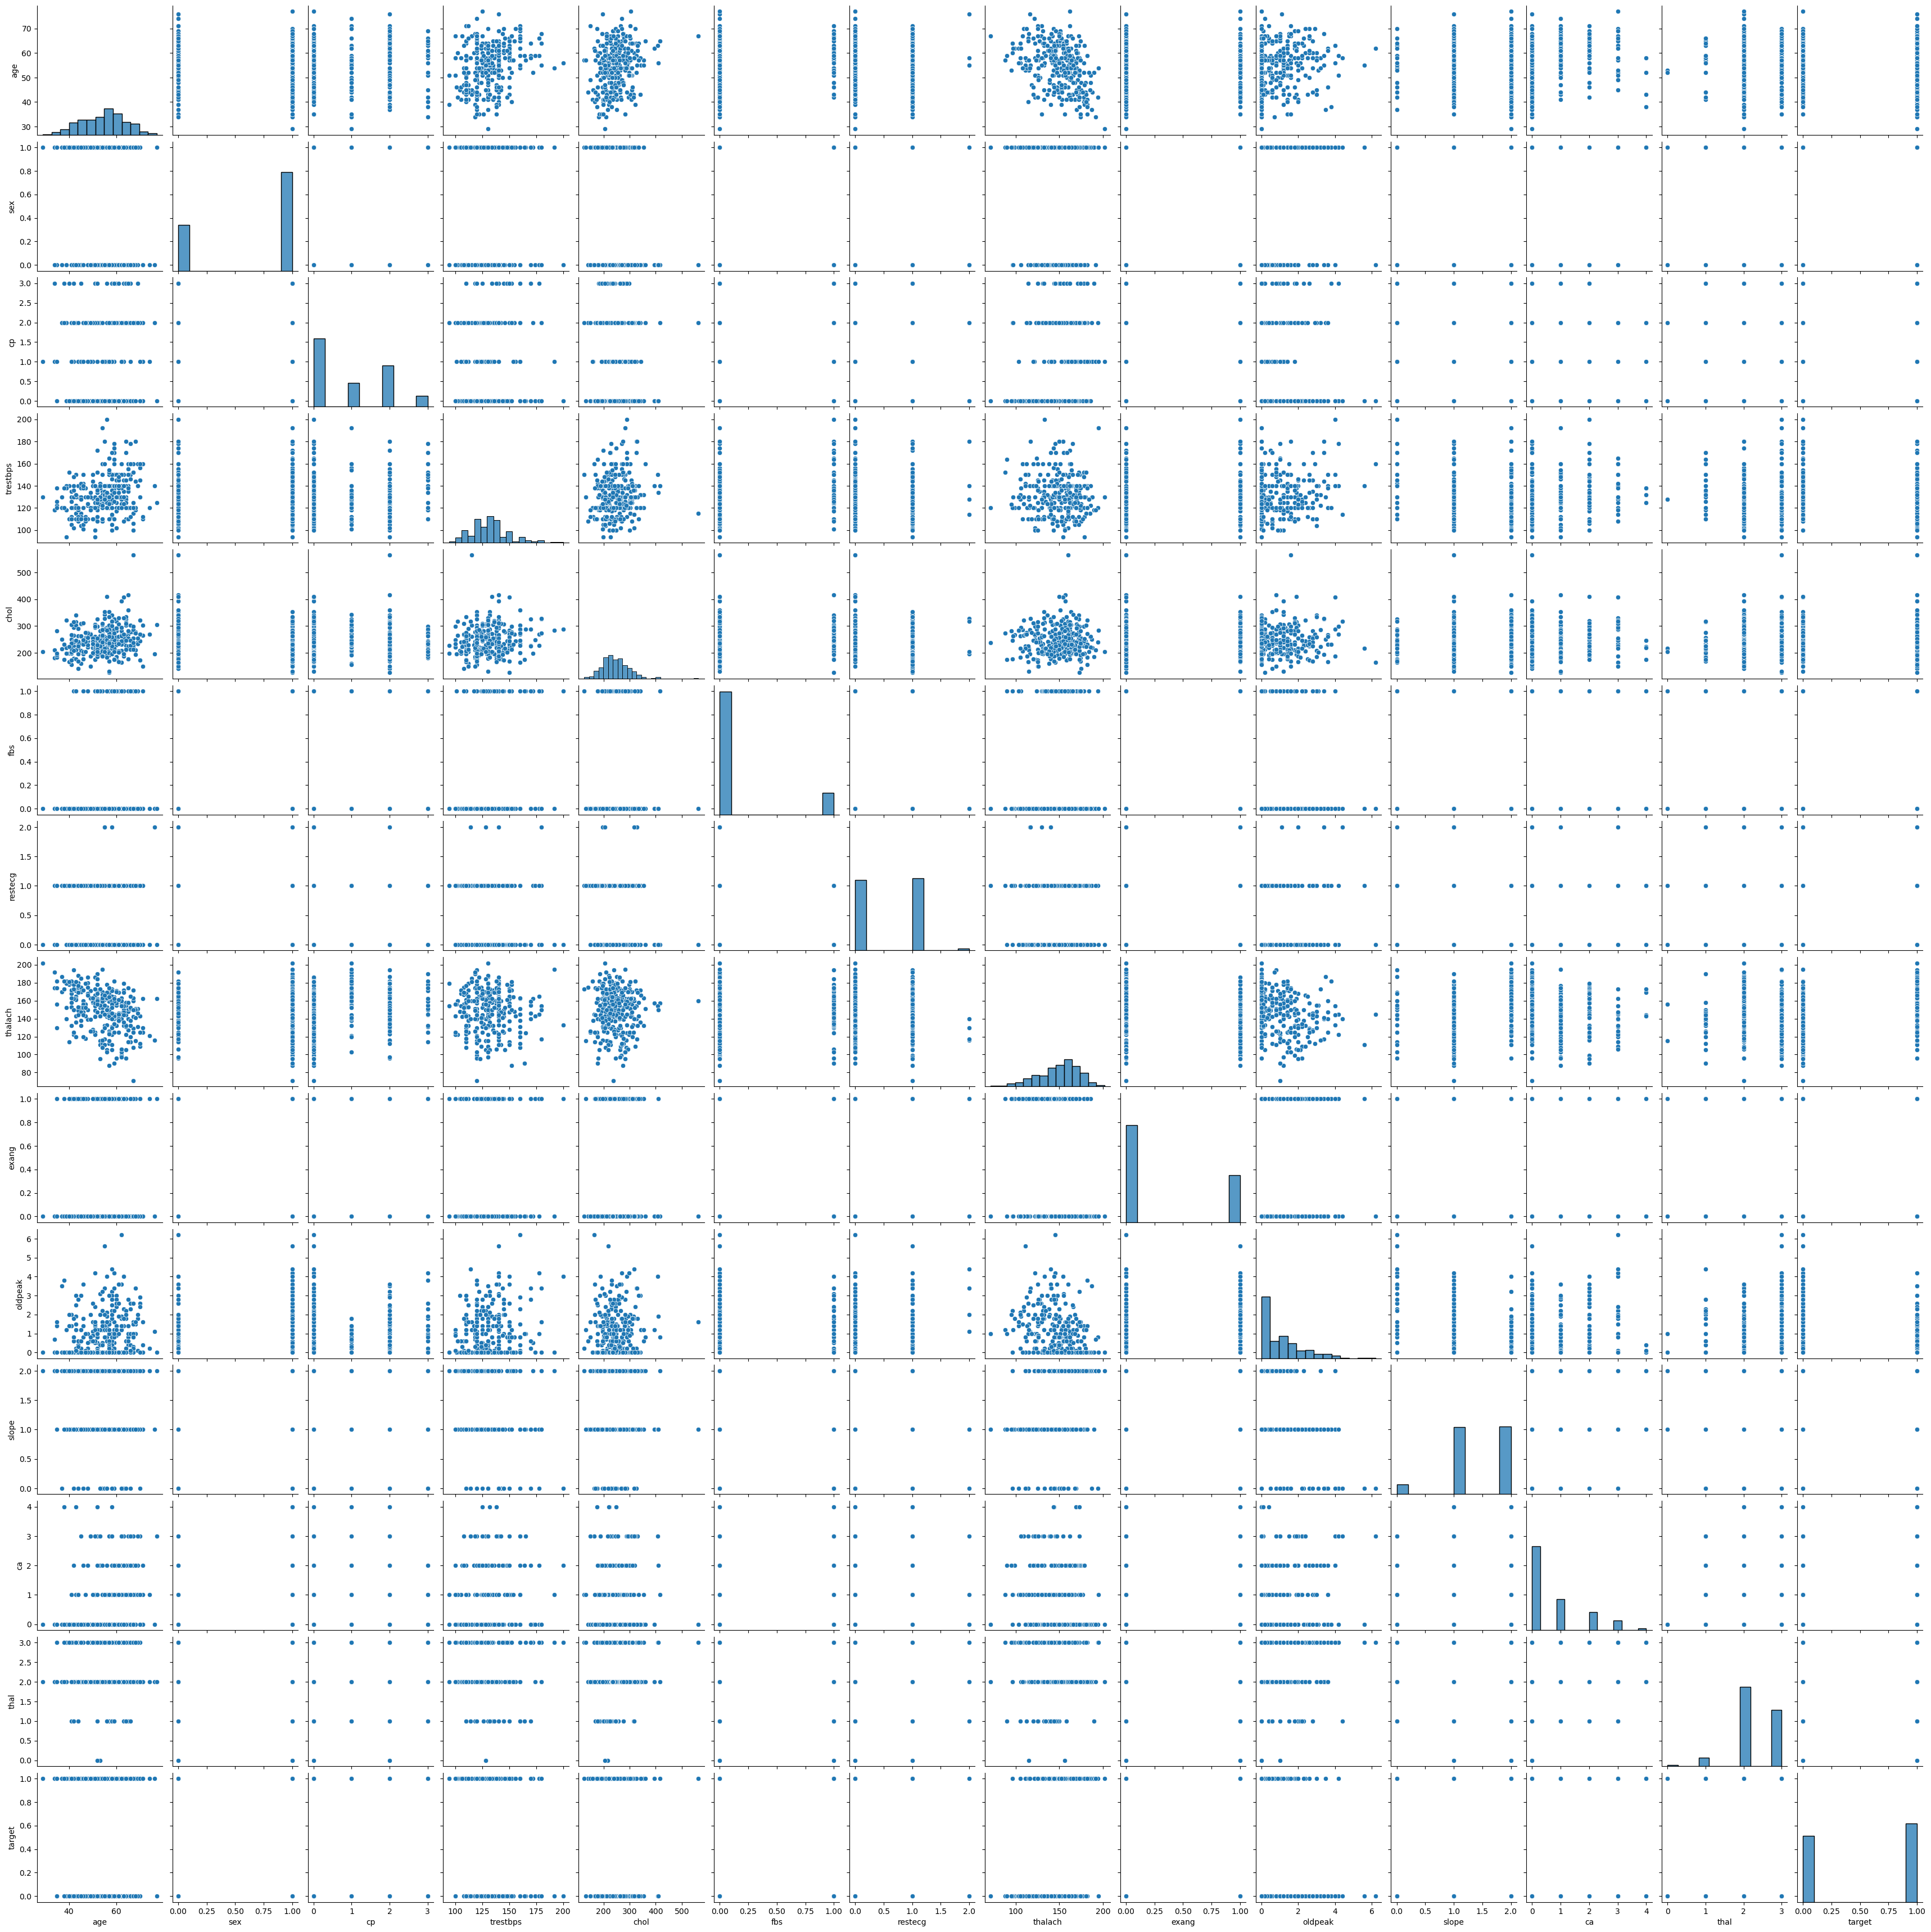

In [10]:
sns.pairplot(df)

target
1    164
0    138
Name: count, dtype: int64


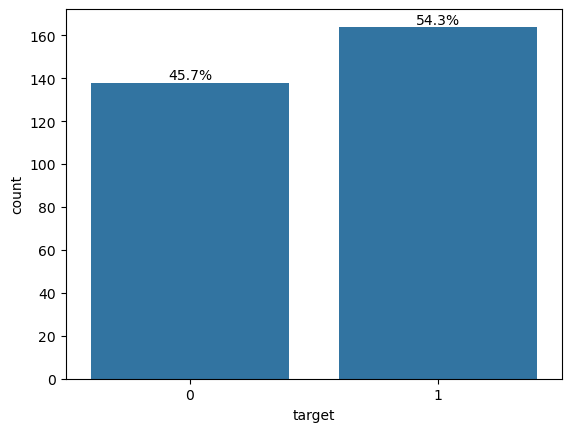

In [11]:
#Checked the count of diagnosis
print(df['target'].value_counts())

ax = sns.countplot(data=df,x='target')
#total count of the target column
total = df['target'].count()
# annotatation
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')

plt.show()

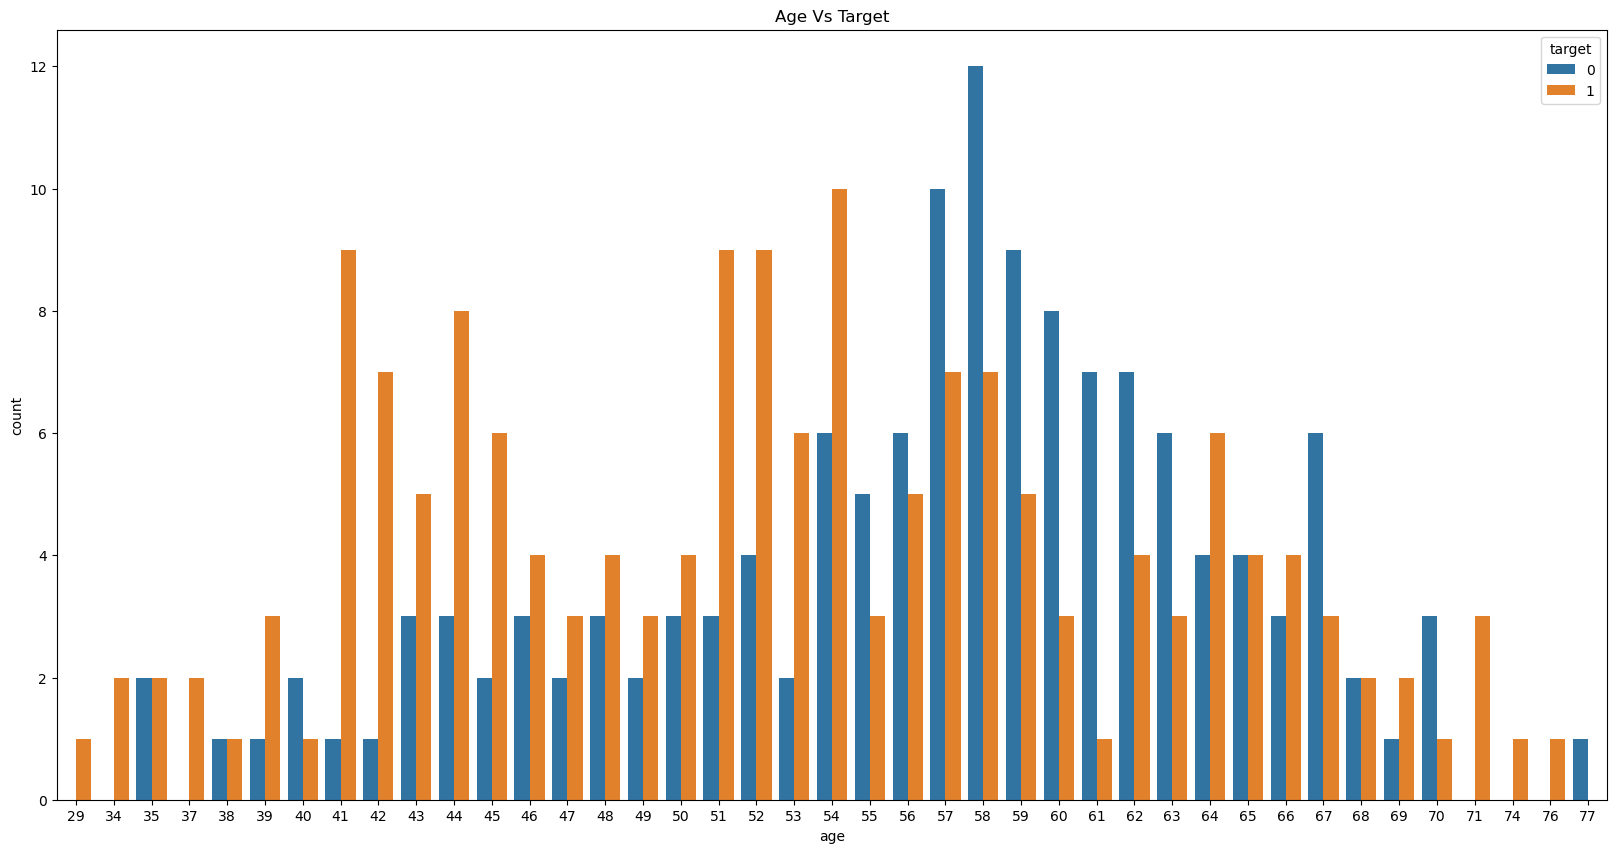

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='age', hue='target')
plt.title('Age Vs Target')
plt.show()

sex
1    206
0     96
Name: count, dtype: int64


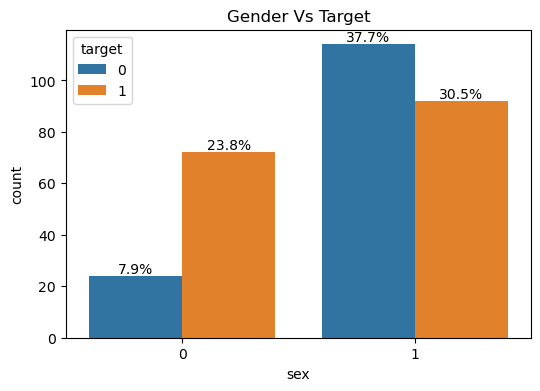

In [13]:
plt.figure(figsize=(6,4))
print(df['sex'].value_counts())
ax = sns.countplot(data=df,x='sex', hue='target')

#total count of the target column
total = df['sex'].count()
# annotatation
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')

plt.title('Gender Vs Target')
plt.show()

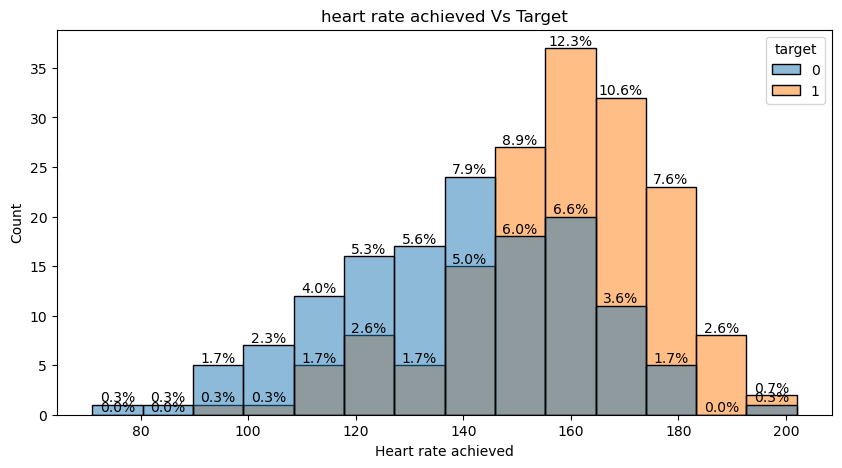

In [14]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=df,x='thalach',hue='target')
plt.title('heart rate achieved Vs Target')
plt.xlabel('Heart rate achieved')

#total count of the target column
total = df['thalach'].count()
# annotatation
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')

plt.show()


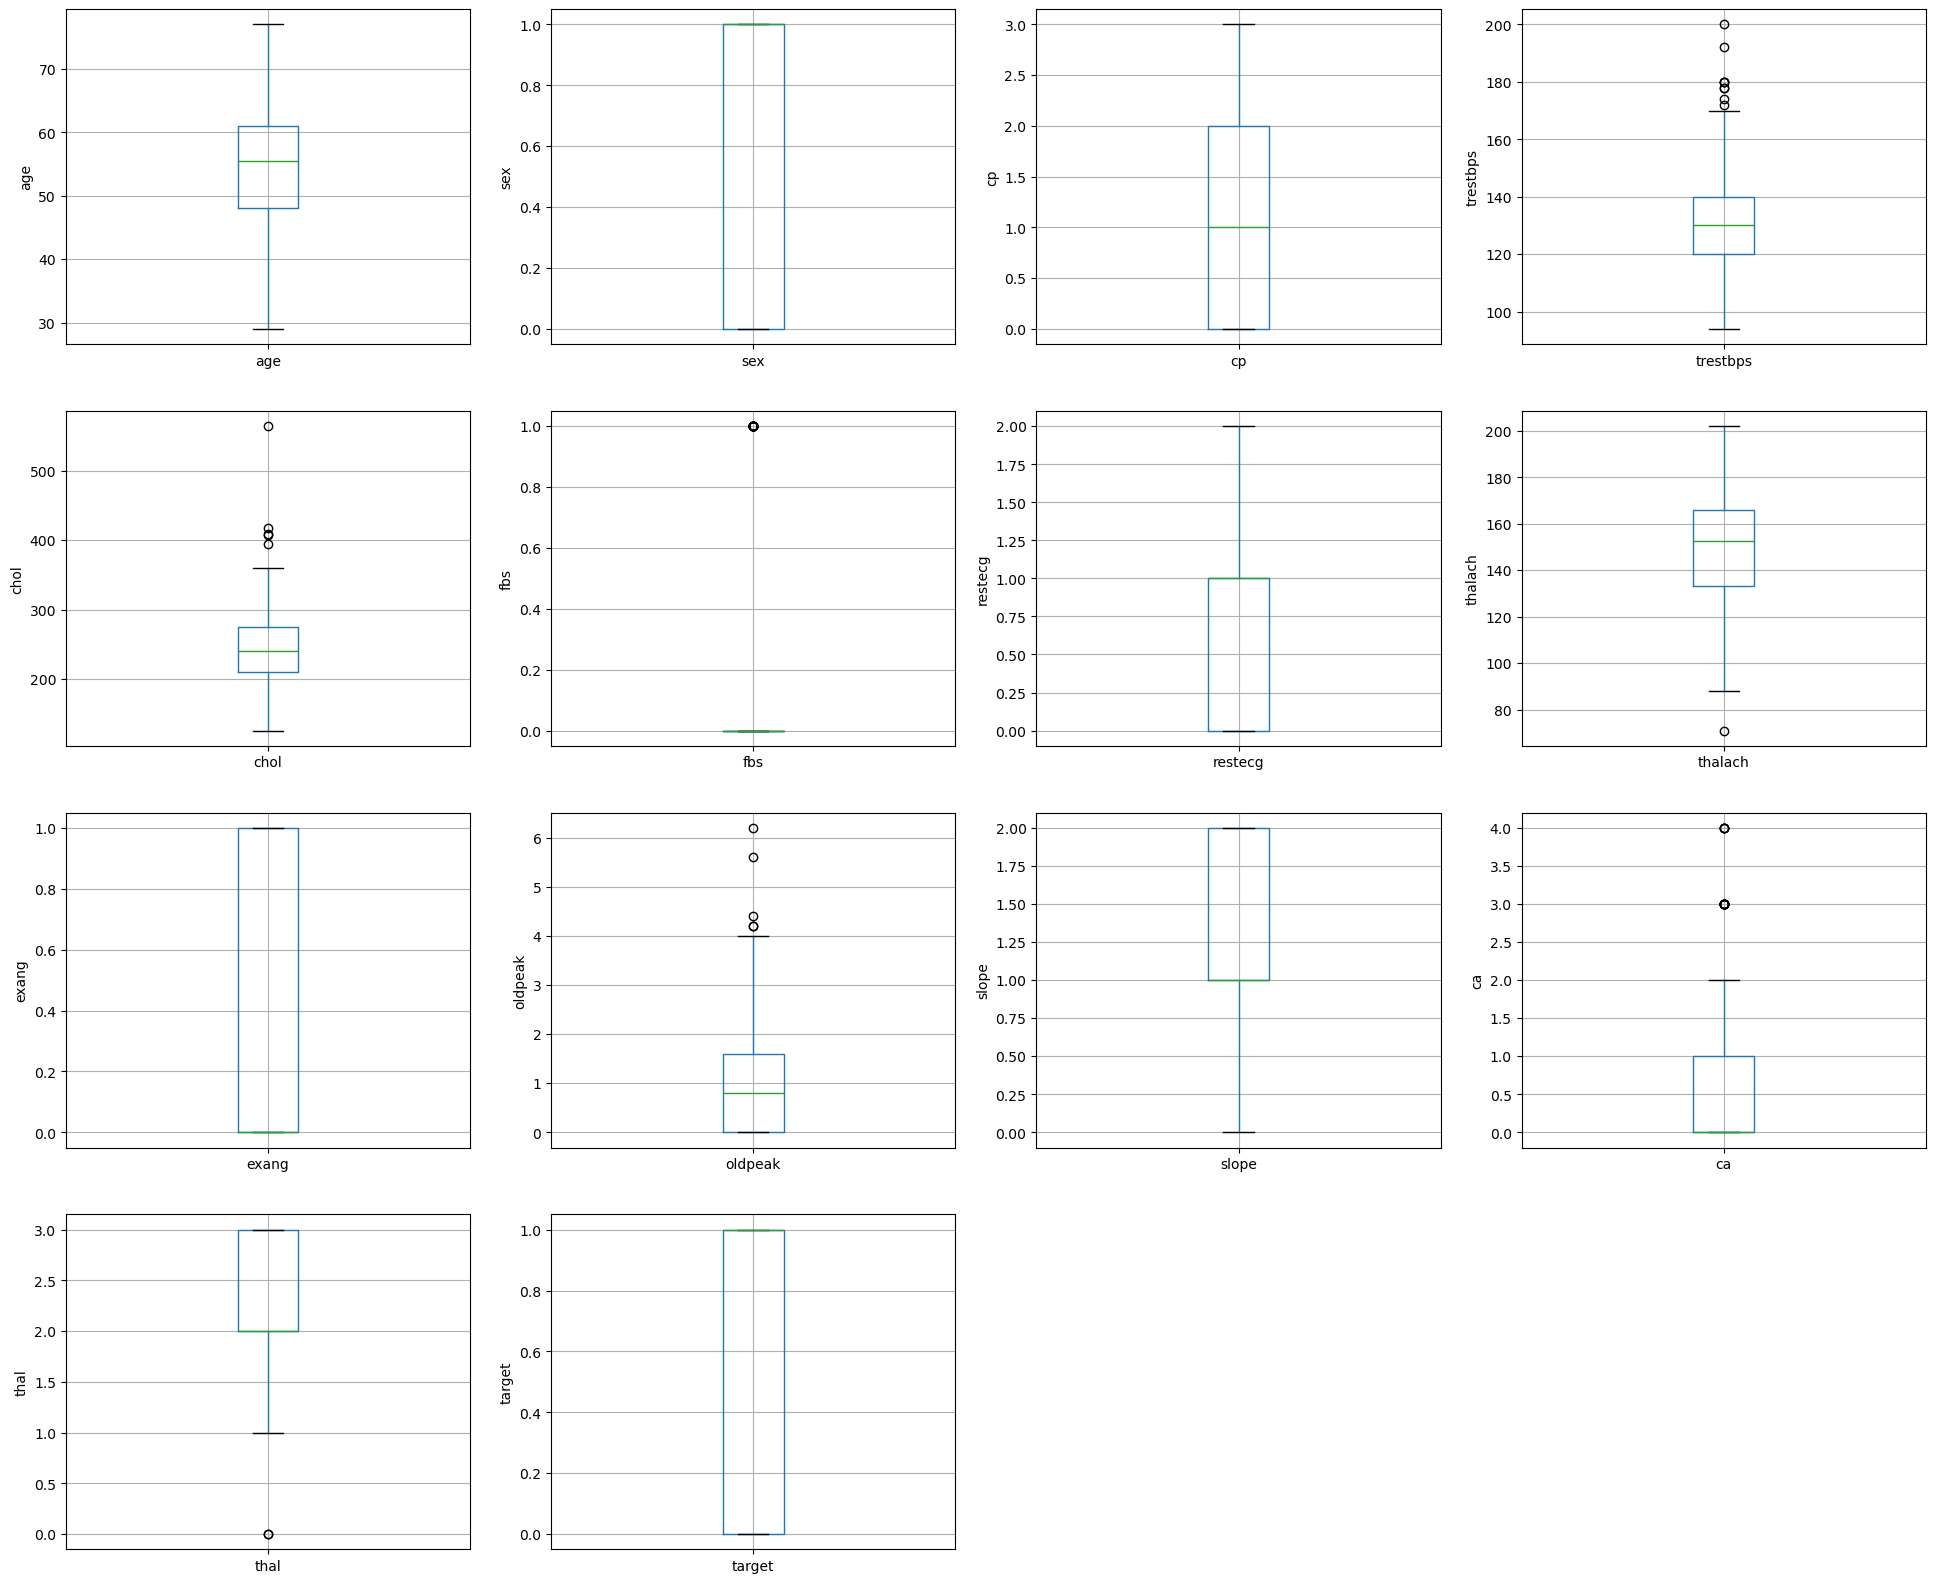

In [15]:
plt.figure(figsize=(24, 20))

for j, i in enumerate(df.columns,1):
    plt.subplot(4, 4, j)
    df.boxplot(column=[i])
    plt.title('')
    plt.ylabel(i)


# Removed outlier using Boxplot

In [16]:
# Remove outlier for cotinuous data 
Columns = df.loc[:,['trestbps' ,'chol' ,'thalach' ,'oldpeak']]

for i in Columns:
    Q1,Q3 =  np.percentile(df[i],[25,75])
    IQR = Q3-Q1
    Lower_fence = Q1 - (1.5*IQR)
    Upper_fence = Q3 + (1.5*IQR)
    print(i)
    print("Lower bound :", Lower_fence,"Upper bound :",  Upper_fence)
    df.loc[df[i] < Lower_fence,i] = Lower_fence
    df.loc[df[i] > Upper_fence,i] = Upper_fence

trestbps
Lower bound : 90.0 Upper bound : 170.0
chol
Lower bound : 115.375 Upper bound : 370.375
thalach
Lower bound : 84.125 Upper bound : 215.125
oldpeak
Lower bound : -2.4000000000000004 Upper bound : 4.0


C:\Users\piyus\AppData\Local\Temp\ipykernel_20712\2147190631.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '115.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] < Lower_fence,i] = Lower_fence
C:\Users\piyus\AppData\Local\Temp\ipykernel_20712\2147190631.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '84.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] < Lower_fence,i] = Lower_fence


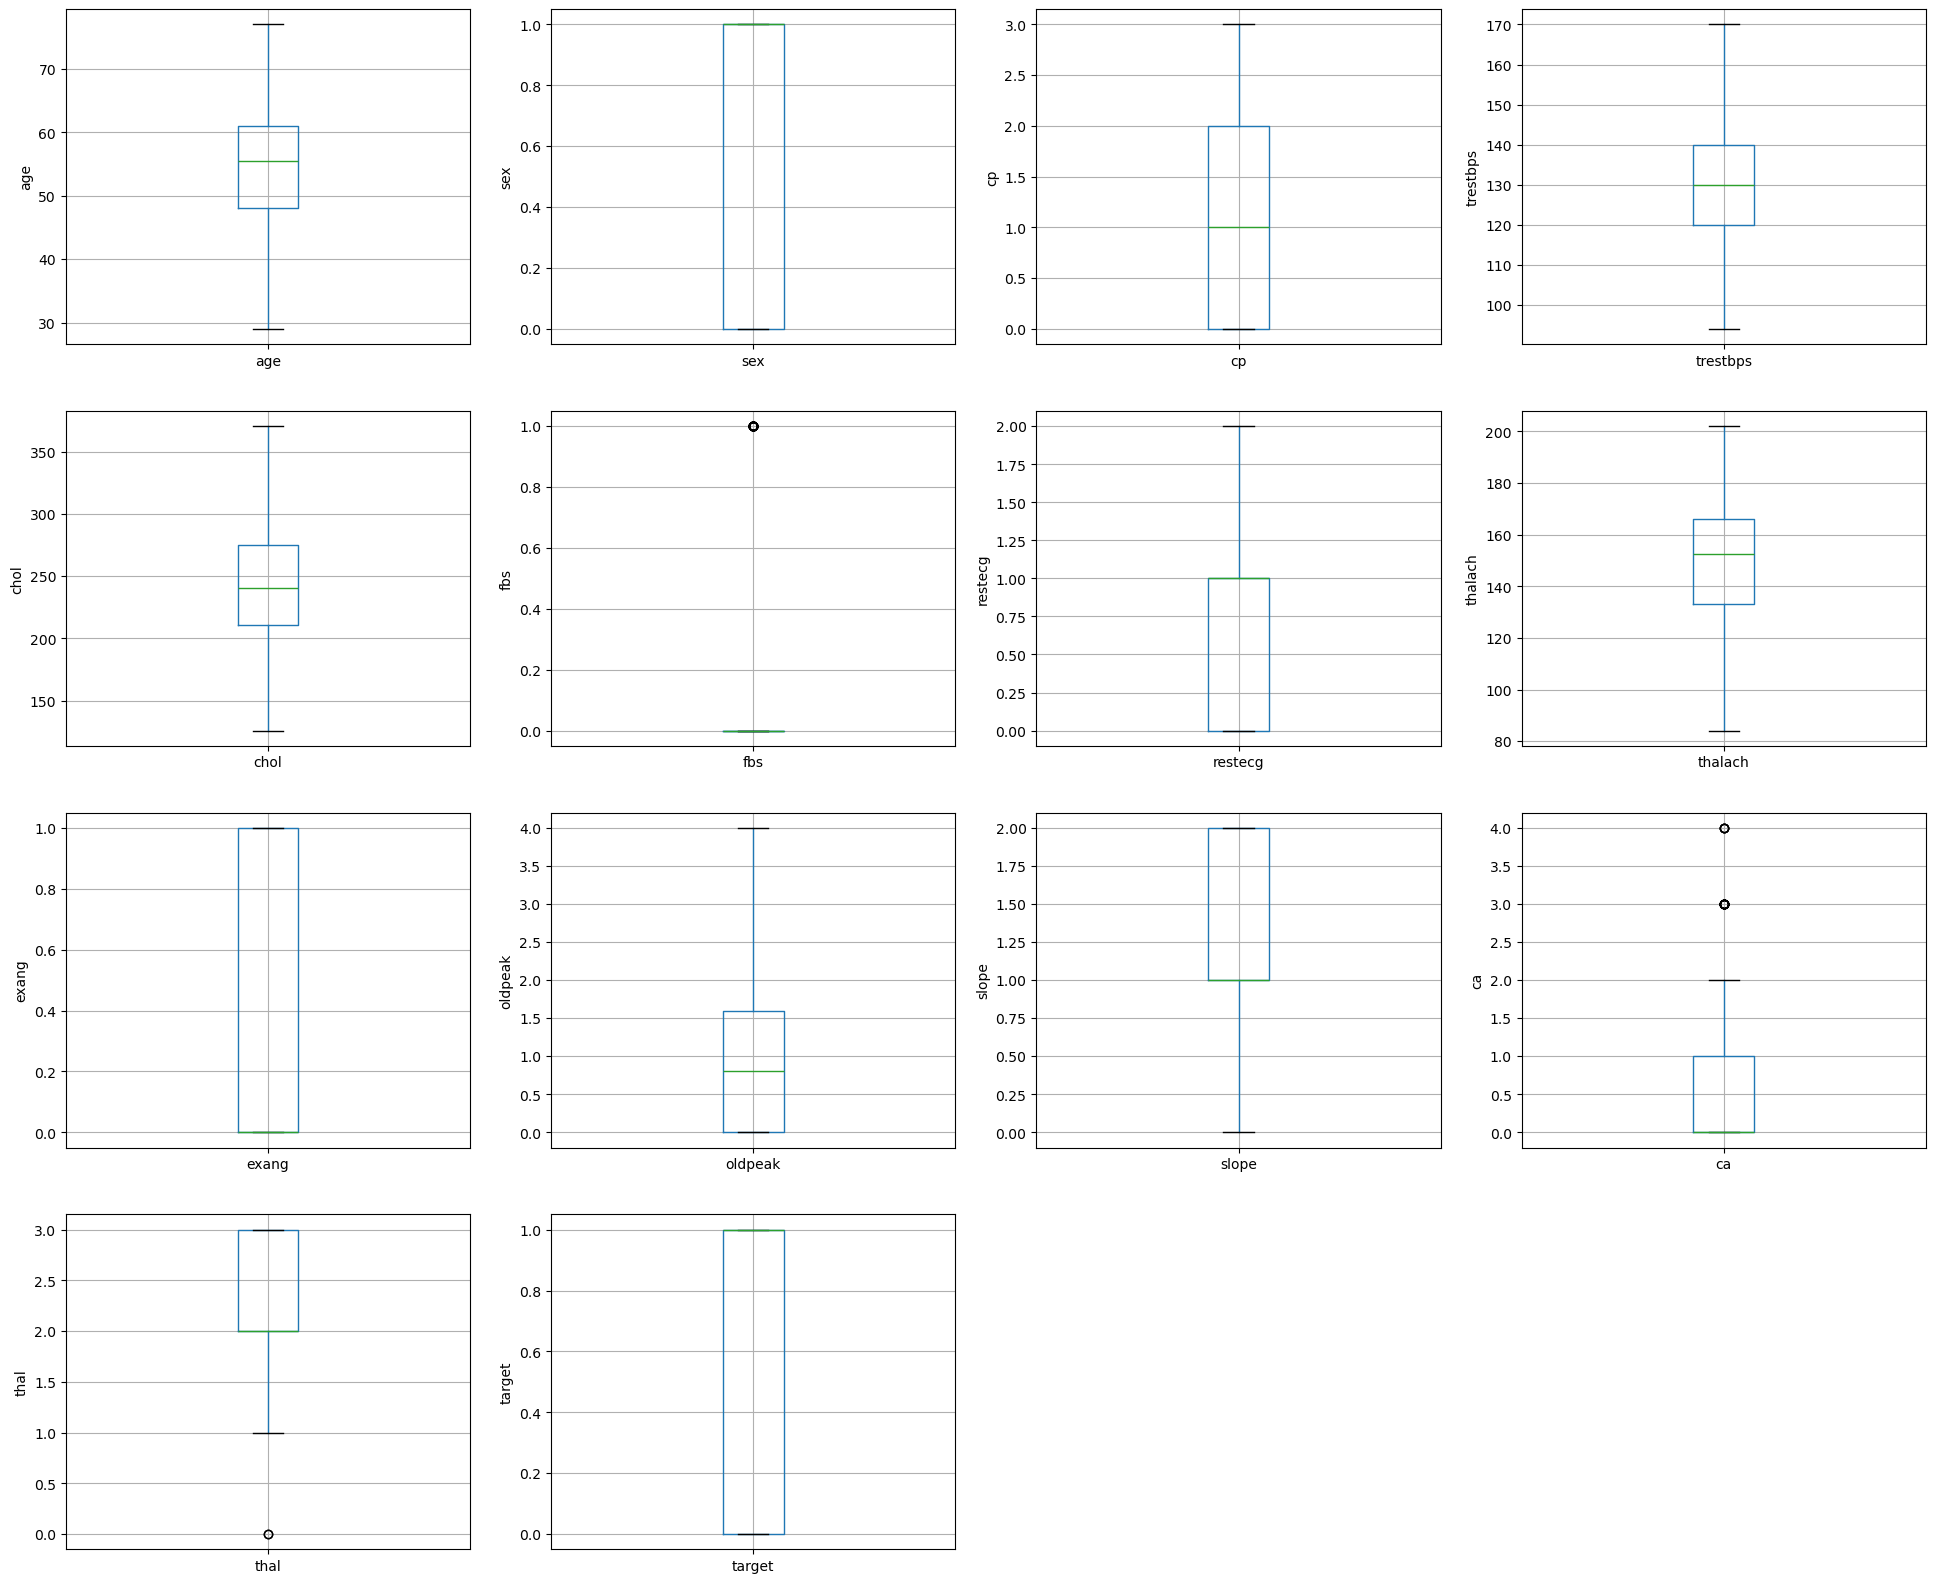

In [17]:
plt.figure(figsize=(24, 20))


for j, i in enumerate(df.columns,1):
    plt.subplot(4, 4, j)
    df.boxplot(column=[i])
    plt.title('')
    plt.ylabel(i)


Text(0.5, 1.0, 'Correlation Matrix')

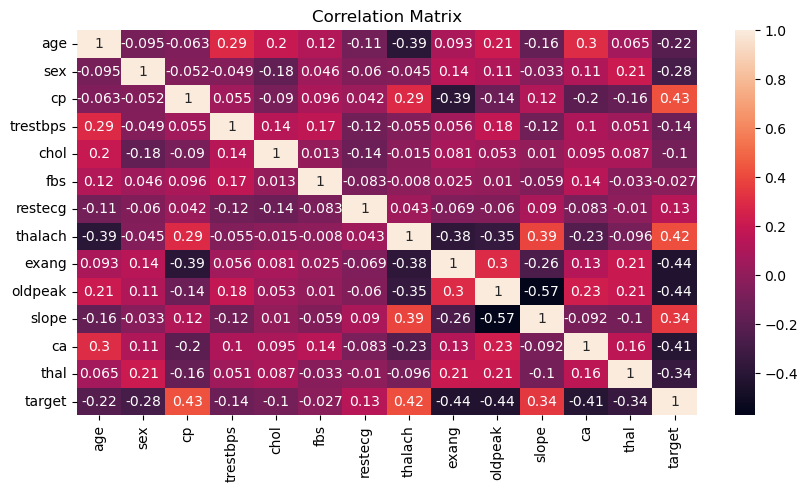

In [18]:
# Finding the correlation between the attribute
plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')


In [19]:
#Seprate the target variable
X = df.drop(columns=['target'])
y = df['target']


In [20]:
#Distribute the data in for test it's 30% and for train it's 70% and the random_state we have kept 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardization scalling

In [21]:
#We have use standardization metthod where μ = 0 and sd = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature selection

[[ 3.33566722e-01  8.08514117e-02 -3.10231443e-01  1.58919060e-01
   8.96828738e-02  5.49390713e-02 -1.08766096e-01 -4.10433902e-01
   3.56071655e-01  4.29646064e-01 -3.45523274e-01  2.99496159e-01
   2.21095133e-01]
 [ 3.57649472e-01 -2.65909318e-01  2.83974240e-01  4.64280689e-01
   3.98048422e-01  3.83331190e-01 -3.17066536e-01  9.44466947e-02
  -2.05670371e-01 -7.12468924e-02  9.02053673e-02  1.08772025e-01
  -1.51656410e-01]
 [ 6.38878427e-02 -6.35950846e-01 -2.66394535e-01  4.59861343e-02
   3.21882362e-01 -3.43405267e-01  2.30401881e-01 -7.07294189e-02
   1.96905783e-01 -7.03552443e-03 -6.55191963e-02 -3.84090894e-01
  -2.19410613e-01]
 [-1.21569441e-01 -1.13334716e-01  3.59959107e-01  1.19986817e-01
  -3.17233161e-01  1.45057753e-01  2.09187581e-01 -3.00944134e-02
  -2.02706364e-01  3.73417541e-01 -5.90477383e-01 -1.53567165e-01
  -3.30587396e-01]
 [ 1.60677747e-01 -2.99097344e-02 -4.57214551e-02 -2.45338900e-01
  -3.15002719e-01 -6.81201214e-02 -4.68096645e-01 -3.87244215e-01


<Figure size 800x500 with 0 Axes>

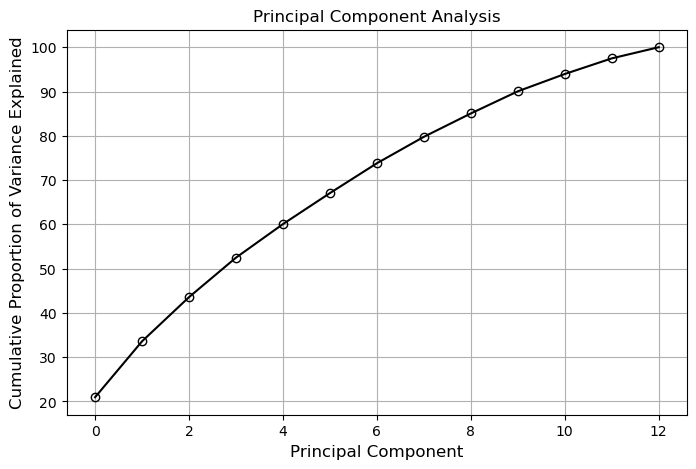

In [22]:
# Fit LDA
pca = PCA(n_components=None)  # Set n_components to None to keep all components
pca_final = pca.fit_transform(X_train)


plt.figure(figsize=(8, 5))
print(pca.components_)

var = pca.explained_variance_ratio_
print(var)


num_important_components = np.argmax(np.cumsum(var) >= 0.98) + 1
print(f"\nNumber of important components: {num_important_components}")

# From this we can see we need all the components
cumulative_var = np.cumsum(np.round(var, decimals=4)*100)


plt.figure(figsize=(8, 5))
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
plt.grid(True)
plt.show()



# SVM Modelling

In [23]:
# if we neeed to manually we can use comment program and comment out below part
#SVM model 'linear', 'poly', 'rbf', 'sigmoid'
#svm_model = svm.SVC(kernel='sigmoid',C=100)
#svm_model.fit(X_train, y_train)
#y_pred = svm_model.predict(X_test)

SVM = svm.SVC(random_state=42)

param_grid = {
    'kernel' : ["poly","linear","rbf","sigmoid"],
    'C' : [1,10,100,150,200]
    }

grid_search = GridSearchCV(estimator=SVM,param_grid=param_grid,cv=6,n_jobs=-1,verbose=2)

grid_search.fit(X_train,y_train)

print(f'Best parameters : {grid_search.best_params_}')

SVM_model = grid_search.best_estimator_
y_pred = SVM_model.predict(X_test)

Fitting 6 folds for each of 20 candidates, totalling 120 fits
Best parameters : {'C': 100, 'kernel': 'linear'}


Accuracy of SVM model on test set : 0.81
Recall of SVM model on test set : 0.84
precision score of SVM model on test set : 0.82
f1 score of SVM model on test set : 0.83


Text(0.5, 14.722222222222216, 'Predicted label')

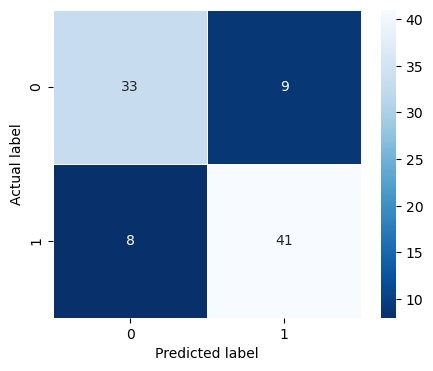

In [24]:
accuracy_ = []
recall_ = []
precision_ = []
f1_ = []

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


accuracy_.append(accuracy)
recall_.append(recall)
precision_.append(precision)
f1_.append(f1)

print(f'Accuracy of SVM model on test set : {accuracy :.2f}')
print(f'Recall of SVM model on test set : {recall :.2f}')
print(f'precision score of SVM model on test set : {precision :.2f}')
print(f'f1 score of SVM model on test set : {f1 :.2f}')

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_mat,annot=True,fmt="d",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# Decision Tree Classification

In [25]:
#Decision tree = entropy,gini
#Dec_tree_model = DecisionTreeClassifier(criterion='gini')
#Dec_tree_model.fit(X_train, y_train)
#y_pred = Dec_tree_model.predict(X_test)


Dec_tree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini','entropy']
    }

grid_search = GridSearchCV(estimator=Dec_tree,param_grid=param_grid,cv=6,n_jobs=-1,verbose=2)

grid_search.fit(X_train,y_train)

print(f'Best parameters : {grid_search.best_params_}')

Dec_tree_model = grid_search.best_estimator_
y_pred = Dec_tree_model.predict(X_test)

Fitting 6 folds for each of 2 candidates, totalling 12 fits
Best parameters : {'criterion': 'entropy'}


Accuracy of Decision tree on test set before pruning : 0.71
Recall of Decision tree on test set before pruning : 0.67
precision score of Decision tree on test set before pruning : 0.77
f1 score of Decision tree on test set before pruning : 0.72


Text(0.5, 14.722222222222216, 'Predicted label')

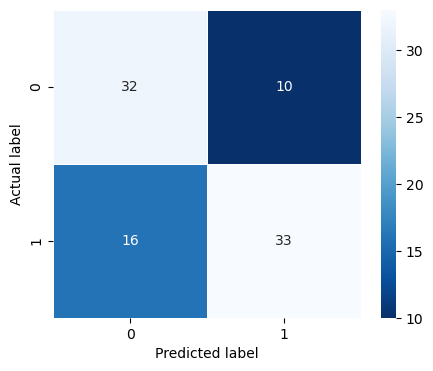

In [26]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy_.append(accuracy)
recall_.append(recall)
precision_.append(precision)
f1_.append(f1)

print(f'Accuracy of Decision tree on test set before pruning : {accuracy :.2f}')
print(f'Recall of Decision tree on test set before pruning : {recall :.2f}')
print(f'precision score of Decision tree on test set before pruning : {precision :.2f}')
print(f'f1 score of Decision tree on test set before pruning : {f1 :.2f}')

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_mat,annot=True,fmt="d",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


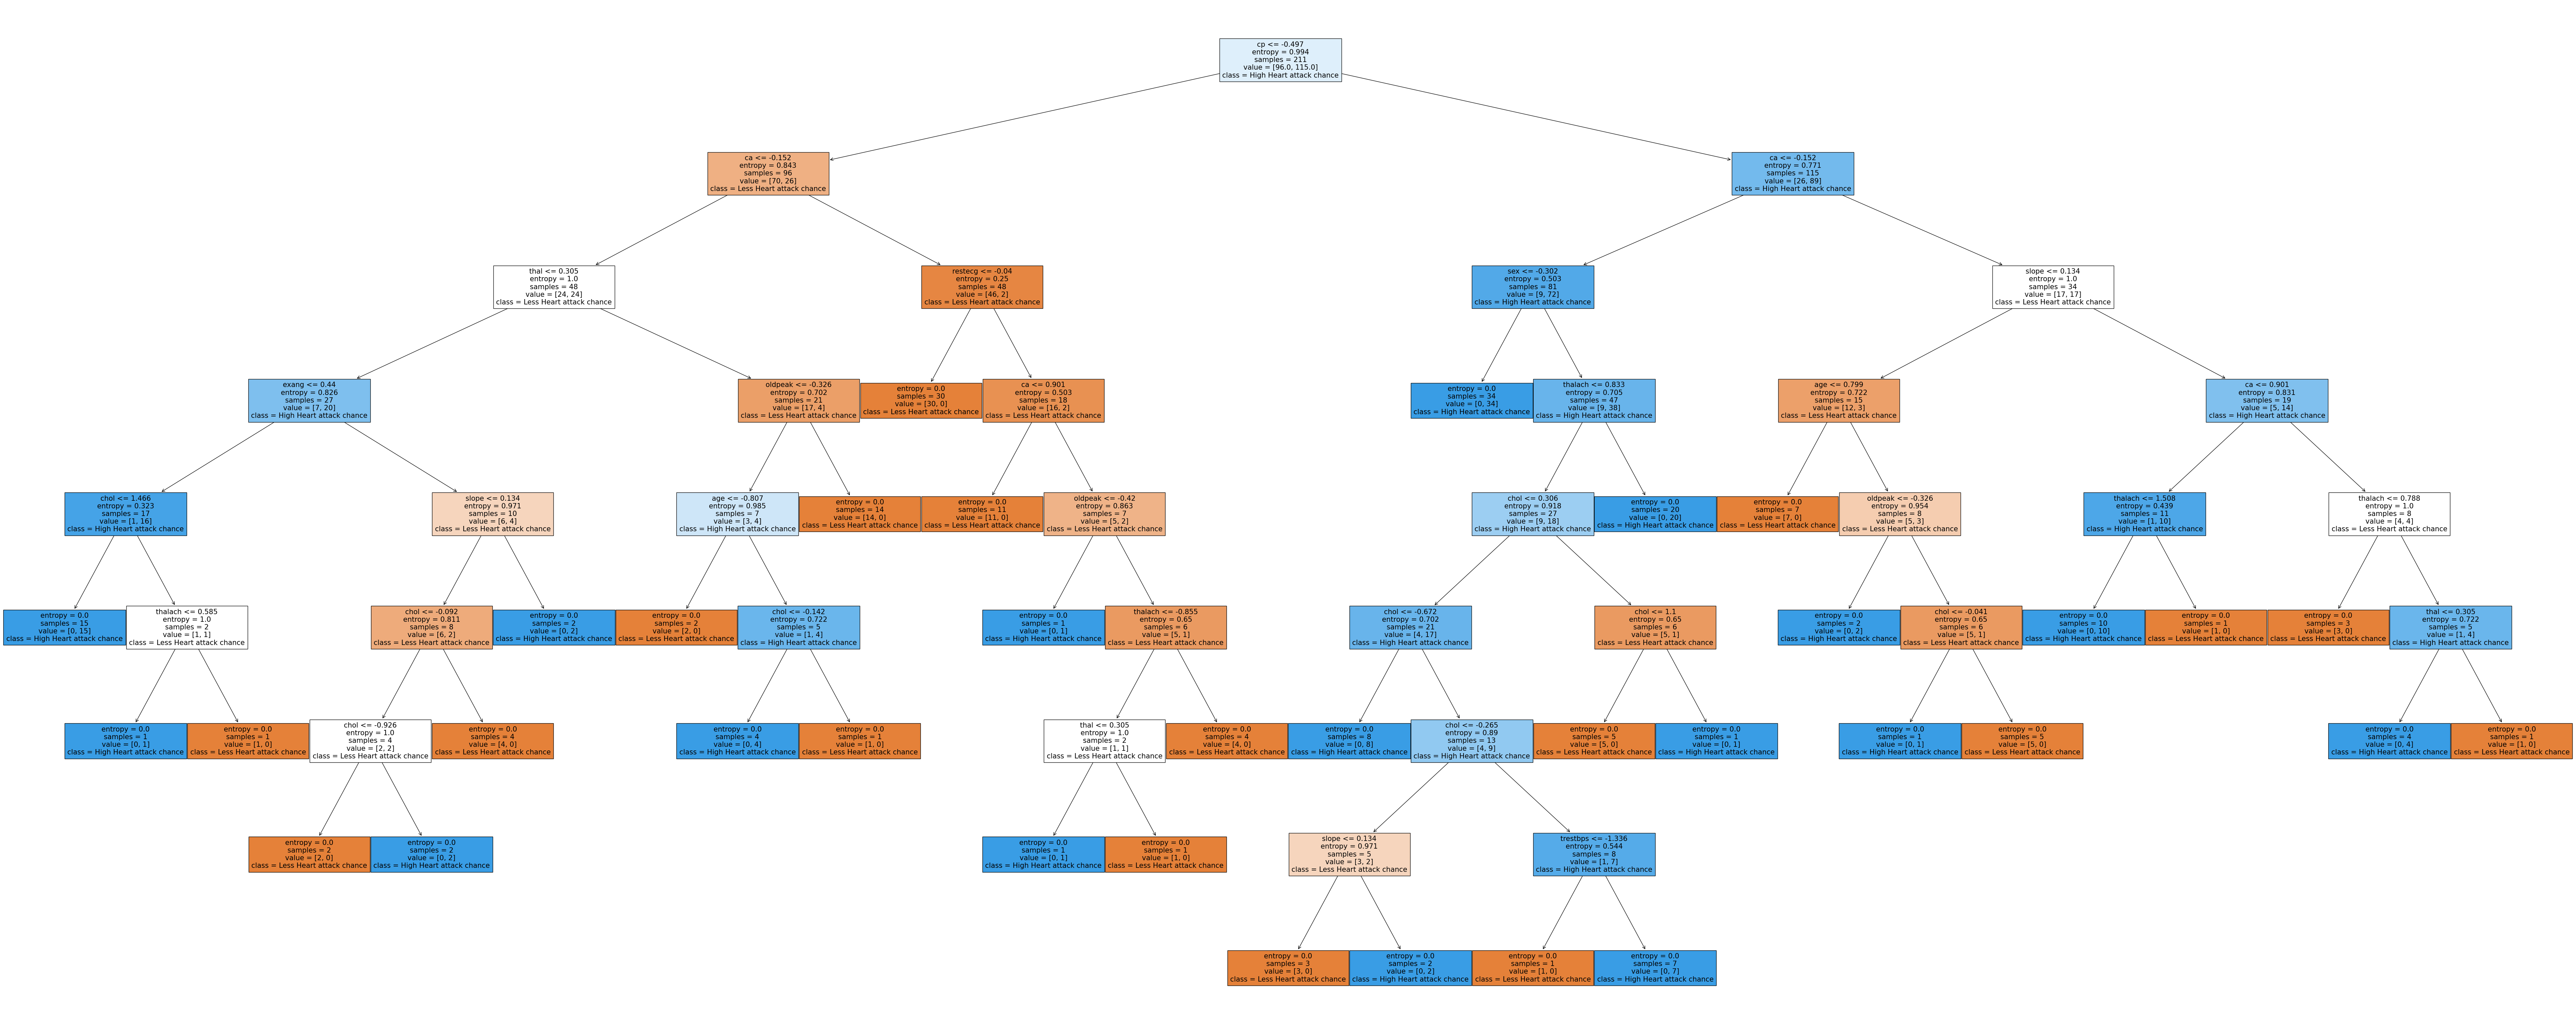

In [27]:
plt.figure(figsize=(100,40))
tree.plot_tree(Dec_tree_model,filled=True,feature_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'],class_names=['Less Heart attack chance','High Heart attack chance'])
plt.show()


In [28]:
#Decision tree post pruning

path = Dec_tree_model.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas


best_alpha = 0
best_accuracy = 0

for ccp_alpha in ccp_alphas:
    Dec_tree_model.set_params(ccp_alpha=ccp_alpha)
    Dec_tree_model.fit(X_train,y_train)
    
    y_pred = Dec_tree_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_alpha = ccp_alpha
        best_accuracy = accuracy


Dec_tree_model.set_params(ccp_alpha = best_alpha)
Dec_tree_model.fit(X_train,y_train)

y_pred = Dec_tree_model.predict(X_test)


Accuracy of Decision tree on test set after pruning : 0.82
Recall of Decision tree on test set after pruning : 0.88
precision score of Decision tree on test set after pruning : 0.81
f1 score of Decision tree on test set after pruning : 0.84


Text(0.5, 14.722222222222216, 'Predicted label')

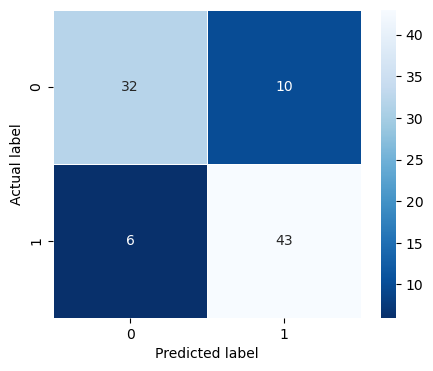

In [29]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy_.append(accuracy)
recall_.append(recall)
precision_.append(precision)
f1_.append(f1)

print(f'Accuracy of Decision tree on test set after pruning : {accuracy :.2f}')
print(f'Recall of Decision tree on test set after pruning : {recall :.2f}')
print(f'precision score of Decision tree on test set after pruning : {precision :.2f}')
print(f'f1 score of Decision tree on test set after pruning : {f1 :.2f}')

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_mat,annot=True,fmt="d",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')




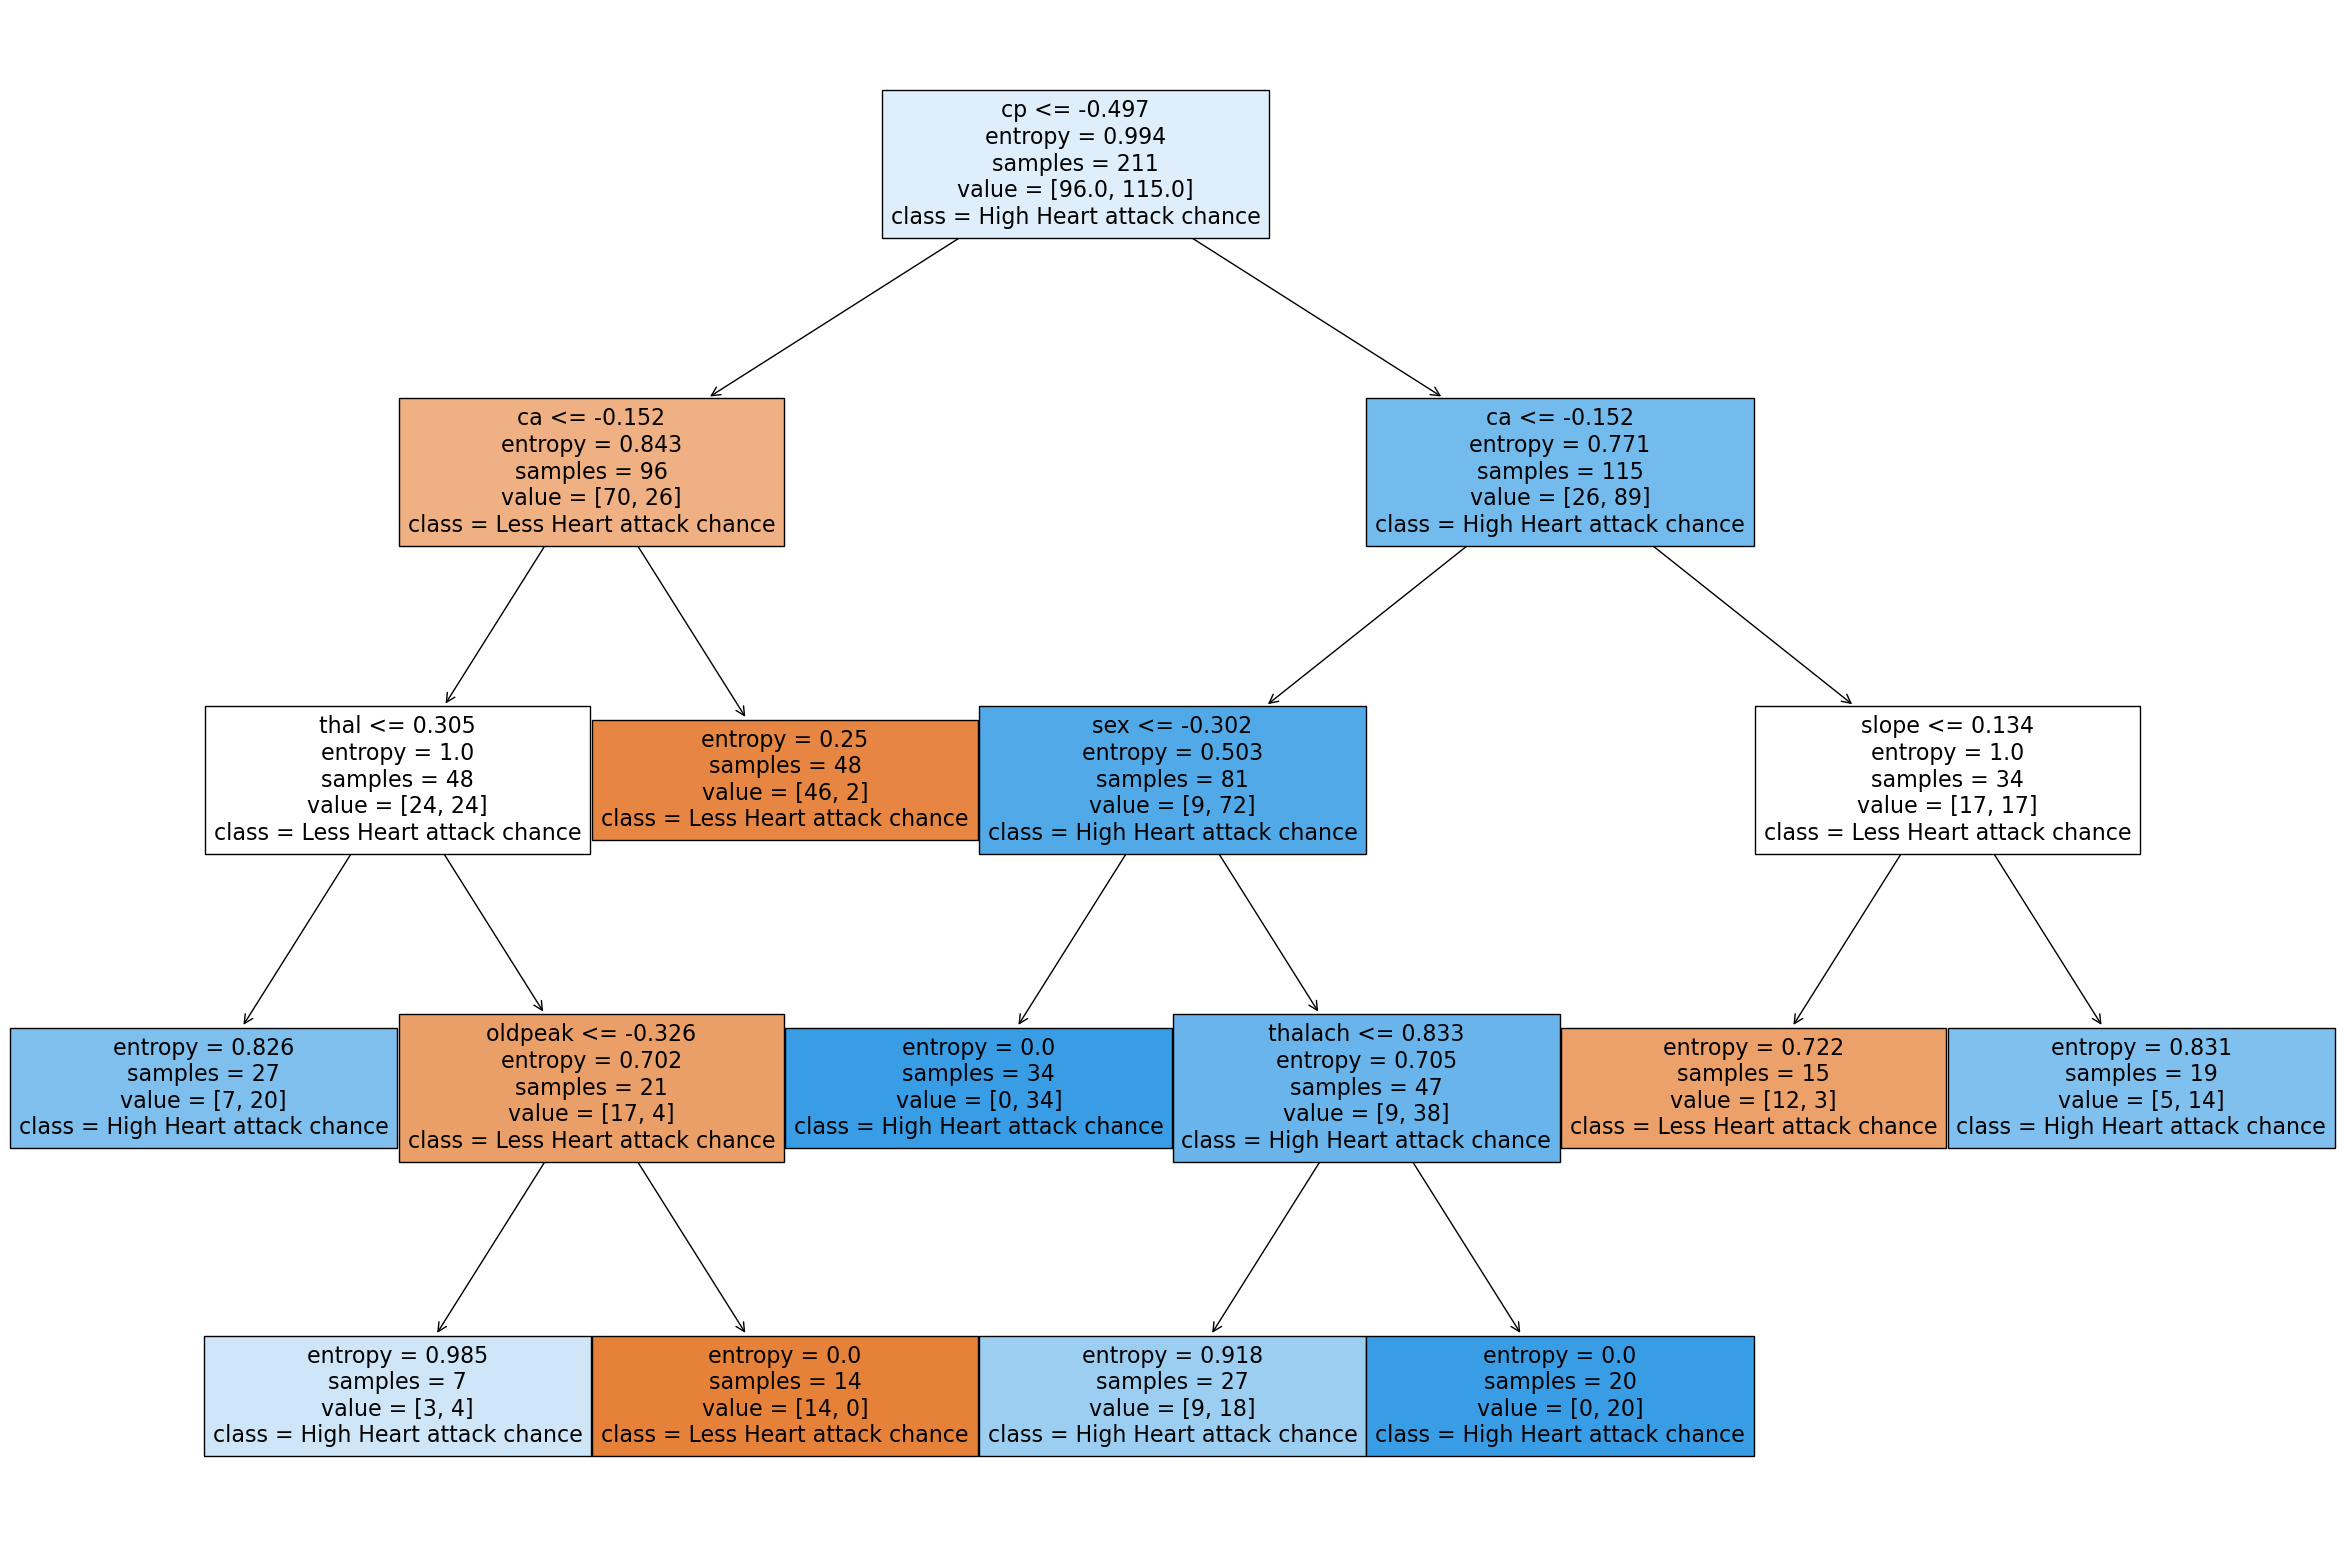

In [30]:
plt.figure(figsize=(30,20))
tree.plot_tree(Dec_tree_model,filled=True,feature_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'],class_names=['Less Heart attack chance','High Heart attack chance'])
plt.show()

# Random Forest

In [31]:
#Random Forest using bootstrap
RF = RandomForestClassifier(
    n_estimators=10,
    max_depth = None,
    min_samples_split= 2,
    min_samples_leaf=1,
    max_features= 'sqrt',
    bootstrap=True,
    random_state=42
    )

param_grid = {
    'n_estimators' : [5,10,15,20,25],
    'max_depth' : [None,10,20],
    'min_samples_split': [2,5,8],
    'min_samples_leaf': [1,2,4,6],
    'max_features': ['sqrt','log2']
    }

grid_search = GridSearchCV(estimator=RF,param_grid=param_grid,cv=6,n_jobs=-1,verbose=2)

grid_search.fit(X_train,y_train)

print(f'Best parameters : {grid_search.best_params_}')

RF_model = grid_search.best_estimator_
y_pred = RF_model.predict(X_test)


Fitting 6 folds for each of 360 candidates, totalling 2160 fits
Best parameters : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}


Accuracy of Random Forest on test set : 0.82
Recall of Random Forest on test set : 0.84
precision score of Random Forest on test set : 0.84
f1 score of Random Forest on test set : 0.84


Text(0.5, 14.722222222222216, 'Predicted label')

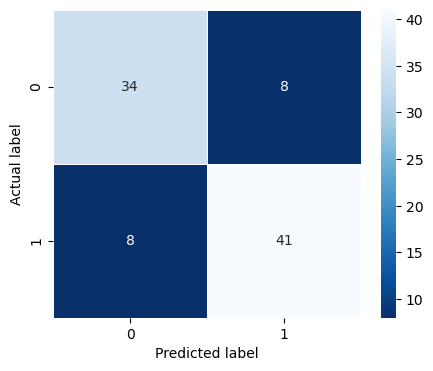

In [32]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy_.append(accuracy)
recall_.append(recall)
precision_.append(precision)
f1_.append(f1)


print(f'Accuracy of Random Forest on test set : {accuracy :.2f}')
print(f'Recall of Random Forest on test set : {recall :.2f}')
print(f'precision score of Random Forest on test set : {precision :.2f}')
print(f'f1 score of Random Forest on test set : {f1 :.2f}')

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_mat,annot=True,fmt="d",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [33]:
model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


Accuracy of Logistic Regression on test set : 0.82
Recall of Logistic Regression on test set : 0.82
precision score of Logistic Regression on test set : 0.85
f1 score of Logistic Regression on test set : 0.83


Text(0.5, 14.722222222222216, 'Predicted label')

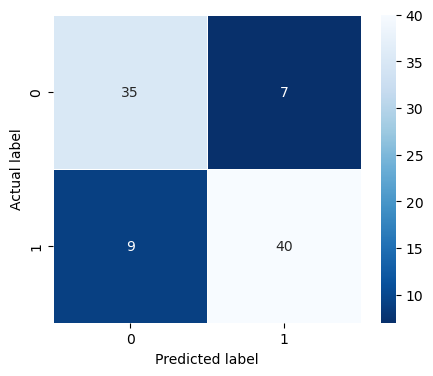

In [34]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy_.append(accuracy)
recall_.append(recall)
precision_.append(precision)
f1_.append(f1)

print(f'Accuracy of Logistic Regression on test set : {accuracy :.2f}')
print(f'Recall of Logistic Regression on test set : {recall :.2f}')
print(f'precision score of Logistic Regression on test set : {precision :.2f}')
print(f'f1 score of Logistic Regression on test set : {f1 :.2f}')

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_mat,annot=True,fmt="d",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# Results

In [35]:
ml = pd.DataFrame({'Accuracy Score' : accuracy_,
                   'Recall Score' : recall_,
                   'Precision Score' : precision_,
                   'F1 Score' : f1_},index=['SVM', 'Decision Tree before prunning', 'Decision Tree after prunning', 'Random Forest', 'Logistic Regression'])

ml

,Accuracy Score,Recall Score,Precision Score,F1 Score
SVM,0.813187,0.836735,0.820000,0.828283
Decision Tree before prunning,0.714286,0.673469,0.767442,0.717391
Decision Tree after prunning,0.824176,0.877551,0.811321,0.843137
Random Forest,0.824176,0.836735,0.836735,0.836735
Logistic Regression,0.824176,0.816327,0.851064,0.833333


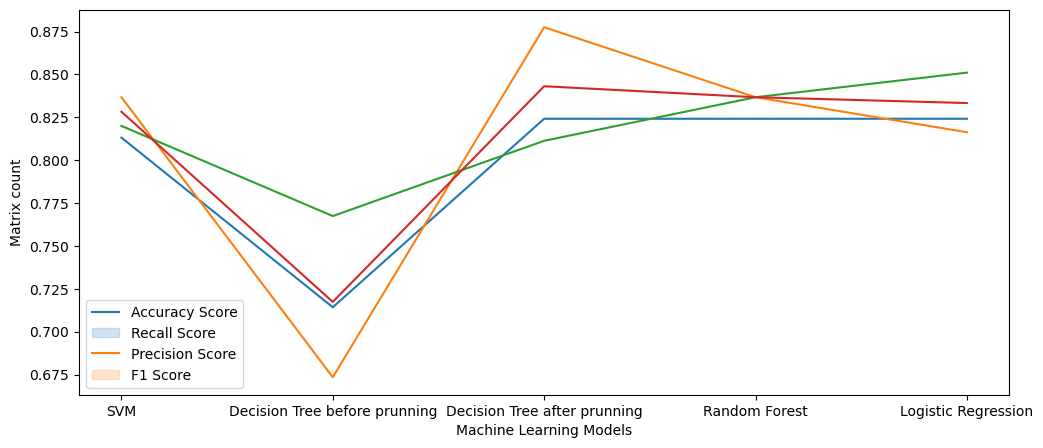

In [36]:
plt.figure(figsize=(12,5))
sns.lineplot(ml['Accuracy Score'])
sns.lineplot(ml['Recall Score'])
sns.lineplot(ml['Precision Score'])
sns.lineplot(ml['F1 Score'])

plt.xlabel('Machine Learning Models')
plt.ylabel('Matrix count')

plt.legend(['Accuracy Score','Recall Score','Precision Score','F1 Score'])

plt.show()